In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


###### DBSCAN

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()
sc_X = sc.fit_transform(df)

In [7]:
from sklearn.cluster import DBSCAN

In [9]:
outlier_percent = []


for e in np.linspace(.001,3,50):
    
    dbscan = DBSCAN(eps= e, min_samples=2*sc_X.shape[1])
    dbscan.fit(sc_X)
    
    outlier_percent.append(np.sum(dbscan.labels_== -1)*100/len(dbscan.labels_))

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


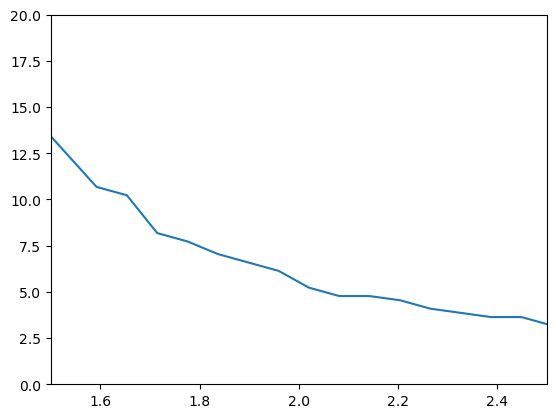

In [11]:
sns.lineplot(x = np.linspace(.001,3,50),y = outlier_percent)
plt.ylim(0,20)
plt.xlim(1.5,2.5)
plt.show()

In [12]:
dbscan = DBSCAN(eps = 2, min_samples=2*sc_X.shape[1])
dbscan.fit(sc_X)

DBSCAN(eps=2, min_samples=16)

<Axes: xlabel='Milk', ylabel='Fresh'>

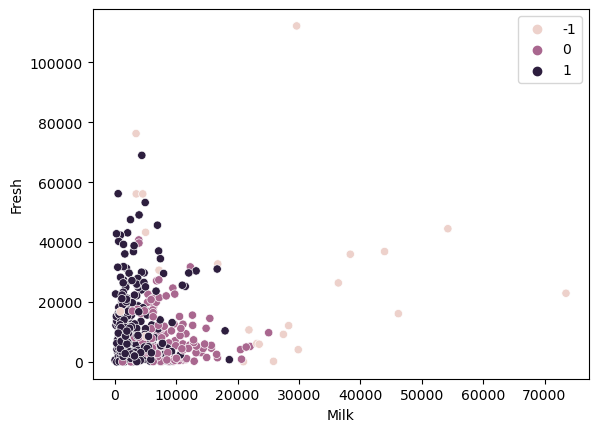

In [14]:
sns.scatterplot(data = df, x="Milk", y = 'Fresh', hue = dbscan.labels_)